In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
actual = pd.read_csv("../input/gene-expression/actual.csv")
test = pd.read_csv("../input/gene-expression/data_set_ALL_AML_independent.csv")
df = pd.read_csv("../input/gene-expression/data_set_ALL_AML_train.csv")

In [3]:
df1 = [col for col in df.columns if 'call' not in col]
# df1 = [col for col in df.columns id 'call' not in col]

In [4]:
df = df[df1]

In [5]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [6]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)

In [7]:
df2.index = pd.to_numeric(df2.index)

In [8]:
df2.sort_index(inplace = True)

In [9]:
df2['cat'] = actual['cancer'][:39]

In [10]:
df2['cat'].replace({'ALL':0,'AML':1},inplace=True)

In [11]:
df2

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,1221,-76,172,-74,645,341,26,193,-53,0
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,819,-178,151,-18,1140,482,10,369,-42,0
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,629,-86,302,23,1799,446,59,781,20,0
9,5,-127,106,268,-210,-535,0,-174,24,506,...,980,6,177,-12,758,385,115,244,-39,0
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,986,26,101,21,570,359,9,171,7,0


In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df2.drop(columns = 'cat'))

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
X_std_pca = pca.fit_transform(X_std)


In [14]:
feature_importance_dataframe = pd.DataFrame(pca.explained_variance_ratio_).reset_index().rename(columns = {'index':'features',0:'feature_importance'})
feature_importance_dataframe['feature_importance'] = feature_importance_dataframe['feature_importance']*100
feature_importance_dataframe.sort_values(by='feature_importance',ascending = False,inplace = True)


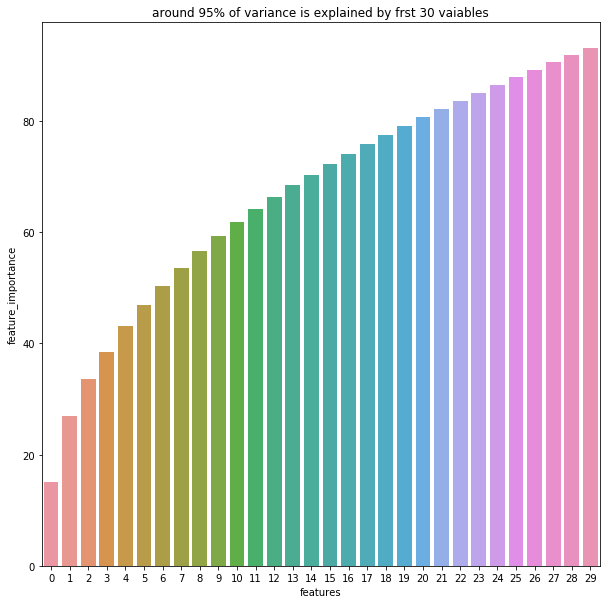

In [15]:
plt.figure(figsize  = (10,10))
sns.barplot(x=feature_importance_dataframe['features'],y=feature_importance_dataframe['feature_importance'].cumsum())
plt.title('around 95% of variance is explained by frst 30 vaiables')
plt.show()

In [16]:
train = pd.DataFrame(X_std_pca)
train['cat'] = df2['cat'].reset_index()['cat']

In [17]:
#lets decompose the variables to three components
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_std_pca_comp_3 = pca.fit_transform(X_std)
y = train['cat']

Text(0.5, 0.92, 'three dimensional representation of the components')

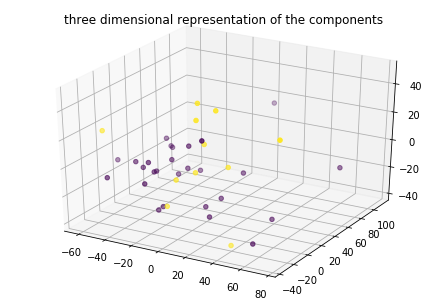

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_std_pca_comp_3[:,0],X_std_pca_comp_3[:,1],X_std_pca_comp_3[:,2],c=y)
plt.title('three dimensional representation of the components')
#required datapoints and there are eigen vectors on the axis
# x-axis first component or eigen vector
# same for all axes

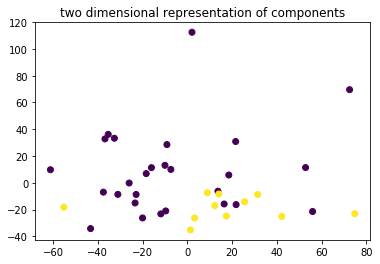

In [19]:
plt.scatter(X_std_pca_comp_3[:,0],X_std_pca_comp_3[:,1],c=y)
plt.title('two dimensional representation of components')
plt.show()

In [20]:
test1 = [col for col in test.columns if 'call' not in col]

In [21]:
test = test[test1]
test

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,67,893,722,612,1950,245,1235,...,618,507,1372,87,1111,707,423,809,466,551
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,263,297,170,370,906,164,9,...,308,64,642,98,459,354,41,445,349,194
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,-33,6,0,29,79,84,7,...,0,-11,-9,-26,-8,-22,0,-2,0,20
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,-33,1971,510,333,170,100,1545,...,196,198,608,153,73,260,1777,210,284,379


In [22]:
test.drop(columns = ['Gene Description','Gene Accession Number'],inplace = True)

In [23]:
test = test.T
#test.index = pd.to_numeric(test.index)
#test.sort_index(inplace = True)

In [24]:
test.index = pd.to_numeric(test.index)

In [25]:
test.sort_index(inplace = True)

In [26]:
test

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [27]:
from sklearn.preprocessing import StandardScaler
X_test_std = StandardScaler().fit_transform(test)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
X_test_std_pca = pca.fit_transform(X_test_std)
test = X_test_std_pca

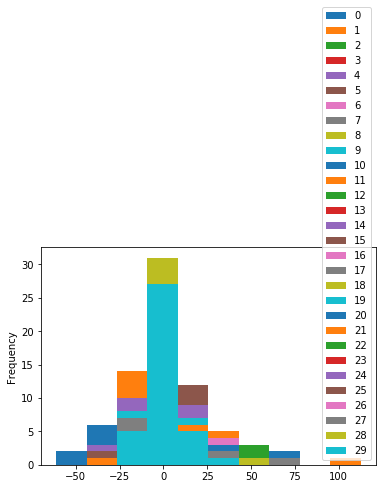

In [29]:
train.drop(columns = 'cat').plot(kind='hist')

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train.drop(columns = 'cat'),train['cat'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [31]:
pred = knn.predict(test)
true = actual['cancer'].replace({'ALL':0,'AML':1})[38:]
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(pred,true)

array([[19, 14],
       [ 1,  0]])

In [32]:
print(classification_report(pred,true))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72        33
           1       0.00      0.00      0.00         1

    accuracy                           0.56        34
   macro avg       0.47      0.29      0.36        34
weighted avg       0.92      0.56      0.70        34



In [33]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train.drop(columns = 'cat'),train['cat'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
pred = clf.predict(test)
true = actual['cancer'].replace({'ALL':0,'AML':1})[38:]

In [35]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.25      0.14      0.18        14

    accuracy                           0.47        34
   macro avg       0.39      0.42      0.40        34
weighted avg       0.42      0.47      0.43        34

